## Task 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
k = 2

datapoints = pd.DataFrame([[0, 0],[1, 0],[1, 1],[0, 3]])
datapoints

,0,1
0,0,0
1,1,0
2,1,1
3,0,3


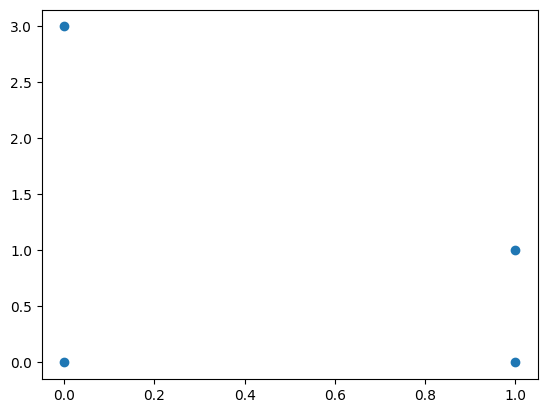

In [ ]:
plt.scatter(datapoints.loc[:,0],  datapoints.loc[:,1])

In [ ]:
def manhattan_dist(x1, x2, y1, y2):
  dist = np.abs(x1-x2) + np.abs(y1-y2)
  return dist

In [ ]:
dists = pd.DataFrame(index=datapoints.index, columns=datapoints.index)

for i in datapoints.index:
    for j in datapoints.index:
        dists.loc[i, j] = manhattan_dist(datapoints.loc[i, 0], datapoints.loc[j, 0], datapoints.loc[i, 1], datapoints.loc[j, 1])

In [ ]:
dists

,0,1,2,3
0,0,1,2,3
1,1,0,1,4
2,2,1,0,3
3,3,4,3,0


In [ ]:
k_nearest_neighbors = pd.DataFrame(index=datapoints.index, columns=[f'Neighbor {i+1}' for i in range(k)])
k_nearest_distances = pd.DataFrame(index=datapoints.index, columns=[f'Distance to {i+1}th Neighbor' for i in range(k)])

for i in datapoints.index:
    sorted_indices = dists.loc[i].sort_values().index
    sorted_distances = dists.loc[i].sort_values().values
    k_nearest_neighbors.loc[i] = sorted_indices[1:k+1]
    k_nearest_distances.loc[i] = sorted_distances[1:k+1]

k_distances = k_nearest_distances.iloc[:, -1]
k_nearest_neighbors

,Neighbor 1,Neighbor 2
0,1,2
1,0,2
2,1,0
3,0,2


In [ ]:
k_distances

,Distance to 2th Neighbor
0,2
1,1
2,2
3,3


In [ ]:
def reachability_dist(x, y):
  rd = max(k_distances[y], dists[x][y])
  return rd

In [ ]:
def lrd(x):
  sum_rd=0
  for i in range(k_nearest_neighbors.shape[1]):
    sum_rd += reachability_dist(x, k_nearest_neighbors.iloc[x][i])
  return k/sum_rd

In [ ]:
lrds = []
for i in datapoints.index:
    lrds.append(lrd(i))
lrds

<ipython-input-11-f48515eb661d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum_rd += reachability_dist(x, k_nearest_neighbors.iloc[x][i])


[0.6666666666666666, 0.5, 0.6666666666666666, 0.3333333333333333]

In [ ]:
lrds = pd.DataFrame(index=datapoints.index, columns=["LRD"])
for i in datapoints.index:
  lrds.loc[i] = lrd(i)
lrds

<ipython-input-11-f48515eb661d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum_rd += reachability_dist(x, k_nearest_neighbors.iloc[x][i])


,LRD
0,0.666667
1,0.5
2,0.666667
3,0.333333


## Task 2

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print("Number of samples:", data.shape[0])

Number of samples: 284807


In [ ]:
print("Class distribution:\n", data['Class'].value_counts())

Class distribution:
 0    284315
1       492
Name: Class, dtype: int64


In [ ]:
class_counts = data['Class'].value_counts()
print("Class distribution:\n", class_counts)

Class distribution:
 0    284315
1       492
Name: Class, dtype: int64


In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
anomaly_fraction = class_counts[1] / len(data)
print("Anomaly fraction:", anomaly_fraction)

Anomaly fraction: 0.001727485630620034


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Fit the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=anomaly_fraction)
y_train_pred = lof.fit_predict(X_train)

# Convert predictions to binary (1 for inliers, -1 for outliers)
y_train_pred = np.where(y_train_pred == -1, 1, 0)

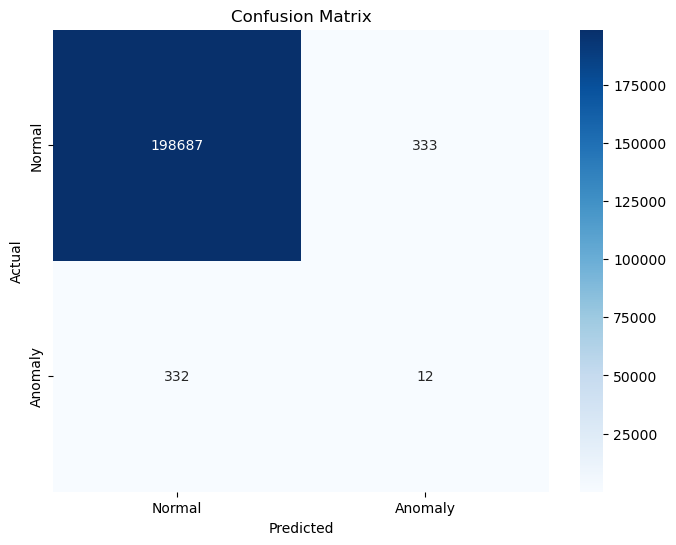

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.03      0.03      0.03       344

    accuracy                           1.00    199364
   macro avg       0.52      0.52      0.52    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_train, y_train_pred))